# Regression Model in Keras: Concrete Compressive Strength

### Project Topic:

In this project, data about concrete compressive strength is modeled using a Keras Regression Model. We experiment with increasing the number of training epochs and changing number of hidden layers and observe how these parameters impact the model's performance. 

### Concrete Data:

The data can be accesed at: https://cocl.us/concrete_data. The predictors of concrete strength include:

- Cement

- Blast Furnace Slag

- Fly Ash

- Water

- Superplasticizer

- Coarse Aggregate

- Fine Aggregate

## 0. Import libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# pre-installed libraries: pandas, scikit-learn, tensorflow

## 1. Load data

In [4]:
data_url = 'https://cocl.us/concrete_data'
df = pd.read_csv(data_url)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# check quick stats
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


### 1.1 Split data into predictors X and target y

In [6]:
X = df[df.columns[df.columns != 'Strength']] # all columns except 'Strength'
y = df['Strength'] # target = 'Strength' column

# check
X.shape, y.shape

((1030, 8), (1030,))

# A. Build a baseline model

In [7]:
def reg_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

## 1. Split Data

In [8]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

## 2. Train Model

In [9]:
model = reg_model()
model.fit(X_train, y_train, epochs=50, verbose=0)

# check
model.summary()

2023-05-29 14:42:49.103362: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


## 3. Evaluate Model

In [10]:
y_pred = model.predict(X_test)

# calculate MSE
mse = mean_squared_error(y_test, y_pred)
mse

10/10 [==============================] - 0s 3ms/step


297.09467634983537

## 4. Repeat 50 Times

In [11]:
# list to store MSE values
mse_vals = []

# 50 iterations
for i in range(50):
    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # build and compile model
    model = reg_model()
    
    # fit model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # calculate MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # store MSE values
    mse_vals.append(mse)
    
mse_vals

10/10 [==============================] - 0s 2ms/step


[1097.7367167620503,
 146.36443395202411,
 112.49729917287718,
 1514.2839671263052,
 249.48955087389876,
 188.22427009290553,
 274.4312347647943,
 119.291201678171,
 88.67255613181457,
 119.54803737033956,
 452.94555909857536,
 866.2885657004973,
 563.2248383524023,
 2603.5182795628252,
 637.2418985800384,
 194.07784507211346,
 107.52706240518773,
 169.56435350642238,
 154.0378325017167,
 115.62225336007715,
 979.4983969195769,
 399.167101559323,
 121.86883947108392,
 164.85933936315044,
 176.37382402547755,
 462.31638720730194,
 556.0229621233357,
 2006.205733722839,
 113.36688402484897,
 85.85997574778467,
 410.4371365492986,
 196.8625233633711,
 128.84449945330567,
 214.21056243118576,
 170.17631901141058,
 319.1901163871266,
 119.91889584754585,
 116.45549436911205,
 189.63778439105837,
 201.2440251440533,
 250.23873580911993,
 261.17591868790925,
 5254.330848136374,
 333.57972315192643,
 156.6245866768535,
 114.50425620780754,
 157.28932705384597,
 968.965003421425,
 120.971982277

## 5. Mean and Standard Deviation of Mean Squared Errors

In [12]:
# calculate mean and standard deviation of MSE values
mse_mean = np.mean(mse_vals)
mse_std = np.std(mse_vals)

# print results
print('Mean Squared Error - Mean: ', mse_mean)
print('Mean Squared Error - Standard Deviation: ', mse_std)

Mean Squared Error - Mean:  503.8059774583481
Mean Squared Error - Standard Deviation:  839.0059101696883


- very high! let's normalize!

# B. Normalize the data

In [17]:
X = df[df.columns[df.columns != 'Strength']]
y = df['Strength']

# normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# check
X_normalized

array([[ 2.47791487, -0.85688789, -0.84714393, ...,  0.86315424,
        -1.21767004, -0.27973311],
       [ 2.47791487, -0.85688789, -0.84714393, ...,  1.05616419,
        -1.21767004, -0.27973311],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -0.52651741,
        -2.24091709,  3.55306569],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ..., -1.03606368,
         0.0801067 , -0.27973311],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.21464081,
         0.19116644, -0.27973311],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -1.39506219,
        -0.15074782, -0.27973311]])

In [19]:
# convert X_normalized back to DataFrame
X_normalized = pd.DataFrame(X_normalized, columns=df.columns[:-1])
X_normalized

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733


In [20]:
# list to store MSE values
mse_vals_norm = []

# 50 iterations
for i in range(50):
    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3)
    
    # build and compile model
    model = reg_model()
    
    # fit model
    model.fit(X_train, y_train, epochs=50, verbose=0)
    
    # calculate MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # store MSE values
    mse_vals_norm.append(mse)
    
mse_vals_norm

10/10 [==============================] - 0s 5ms/step


[295.6990302822031,
 426.9235019728791,
 382.6511696373095,
 305.25674543549536,
 387.8296124734932,
 295.74975146845225,
 360.8257979281389,
 337.92157630768764,
 597.261540049166,
 306.57688001835487,
 243.1861732391953,
 245.05562498777564,
 302.44961567669634,
 340.66892252869275,
 464.4796200788352,
 243.27541290754502,
 676.2043137679162,
 297.0265468785594,
 527.9546619190287,
 346.1608436687176,
 438.62886375287655,
 263.90270296786355,
 481.1584674710467,
 267.13392229924835,
 424.56382631205605,
 273.41755206752,
 508.2749166904541,
 287.0127176240268,
 410.05272093078554,
 305.9849796957729,
 282.5214238724745,
 359.04279573935787,
 538.5349350449694,
 303.08255147593627,
 309.26676043311716,
 267.3455973324319,
 364.22560328964533,
 549.4455575346083,
 477.25569675557574,
 271.91679503639534,
 205.43548499152288,
 340.9989253479782,
 308.7455775026074,
 396.66585331024453,
 319.5228660236944,
 314.2904385429905,
 255.10442546207264,
 256.99232145194395,
 280.5081463407275,


In [21]:
# calculate mean and standard deviation of MSE values - X_normalized
mse_mean_norm = np.mean(mse_vals_norm)
mse_std_norm = np.std(mse_vals_norm)

# print results
print('Mean Squared Error - Mean: ', mse_mean_norm)
print('Mean Squared Error - Standard Deviation: ', mse_std_norm)

Mean Squared Error - Mean:  354.42010430265765
Mean Squared Error - Standard Deviation:  102.19150539749852


- lower values

# C. Increase the number of epochs: 100

In [22]:
# list to store MSE values
mse_vals_norm_2 = []

# 50 iterations
for i in range(50):
    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3)
    
    # build and compile model
    model = reg_model()
    
    # fit model
    model.fit(X_train, y_train, epochs=100, verbose=0)
    
    # calculate MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # store MSE values
    mse_vals_norm_2.append(mse)
    
mse_vals_norm_2

10/10 [==============================] - 0s 1ms/step


[157.08465737551737,
 204.35575524756243,
 171.01363655293753,
 190.76611031473197,
 193.8601501654402,
 159.6455828613055,
 166.10324130895518,
 143.65461016035258,
 145.12329253067054,
 167.0887147589644,
 160.1172012530923,
 188.79728836852925,
 187.1383323116765,
 170.01893699935846,
 150.85768041452525,
 156.79402057050177,
 145.18658184599767,
 188.5342805245602,
 157.55454577474572,
 153.00362484091835,
 168.92840874072158,
 149.74009878966822,
 175.5180061209798,
 216.5331513850556,
 166.87865185465856,
 149.3790938659572,
 147.9133237258617,
 160.36803466504793,
 173.3743752496801,
 164.64372641974953,
 192.5491697762501,
 145.26957597431607,
 160.34232929271687,
 166.74740725649562,
 162.15737663470446,
 168.55334818881667,
 173.10097571936993,
 144.9489429330894,
 171.0869628311223,
 171.85513631350554,
 167.4754522265203,
 147.8015474425924,
 172.53008155496212,
 171.16550664071247,
 201.26149892661107,
 183.15754803827983,
 158.23574857883852,
 148.62459034905083,
 166.465

In [23]:
# calculate mean and standard deviation of MSE values - X_normalized
mse_mean_norm_2 = np.mean(mse_vals_norm_2)
mse_std_norm_2 = np.std(mse_vals_norm_2)

# print results
print('Mean Squared Error - Mean: ', mse_mean_norm_2)
print('Mean Squared Error - Standard Deviation: ', mse_std_norm_2)

Mean Squared Error - Mean:  167.36928132350747
Mean Squared Error - Standard Deviation:  16.742681939058116


- values even lower

# D. Increase the number of hidden layers: 3

In [24]:
def reg_model_3l():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [25]:
# list to store MSE values
mse_vals_norm_3 = []

# 50 iterations
for i in range(50):
    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3)
    
    # build and compile model
    model = reg_model_3l()
    
    # fit model
    model.fit(X_train, y_train, epochs=100, verbose=0)
    
    # calculate MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    # store MSE values
    mse_vals_norm_3.append(mse)
    
mse_vals_norm_3

10/10 [==============================] - 0s 2ms/step


[54.200824824327974,
 114.74278429471633,
 68.2354048939986,
 106.58038375880297,
 92.22055581634403,
 60.853050737367035,
 56.23213870482294,
 77.58150858555531,
 91.40597556531468,
 116.48843503255588,
 118.61889050364111,
 67.8686820754063,
 98.92953647988813,
 102.2631982899902,
 112.44605533745657,
 109.03918550700017,
 56.71343461081323,
 113.18448363036643,
 103.9000100794312,
 82.1674215964328,
 78.33492782627356,
 128.20564324428761,
 98.84179674923637,
 80.4588690702464,
 107.58977104150838,
 103.85032588208477,
 53.00266878848829,
 67.09218099987191,
 69.6809673363667,
 59.82612977769289,
 94.03724614932786,
 49.08861732332758,
 66.92073635091916,
 46.4282809386161,
 105.07212557535354,
 112.59904504614111,
 71.08271501650383,
 59.752170805334785,
 94.64811403076415,
 79.08127891424817,
 62.06495149518376,
 81.2859741389636,
 82.08613333733327,
 113.54910709786338,
 57.84948314798926,
 103.75536217930676,
 120.34384970869692,
 133.12672234110156,
 123.2882004153342,
 114.807

In [26]:
# calculate mean and standard deviation of MSE values - X_normalized
mse_mean_norm_3 = np.mean(mse_vals_norm_3)
mse_std_norm_3 = np.std(mse_vals_norm_3)

# print results
print('Mean Squared Error - Mean: ', mse_mean_norm_3)
print('Mean Squared Error - Standard Deviation: ', mse_std_norm_3)

Mean Squared Error - Mean:  88.42845782972408
Mean Squared Error - Standard Deviation:  23.930376555893854


- great! adding layers to our model clearly made a difference.

# Plot all 4 sets of MSE values

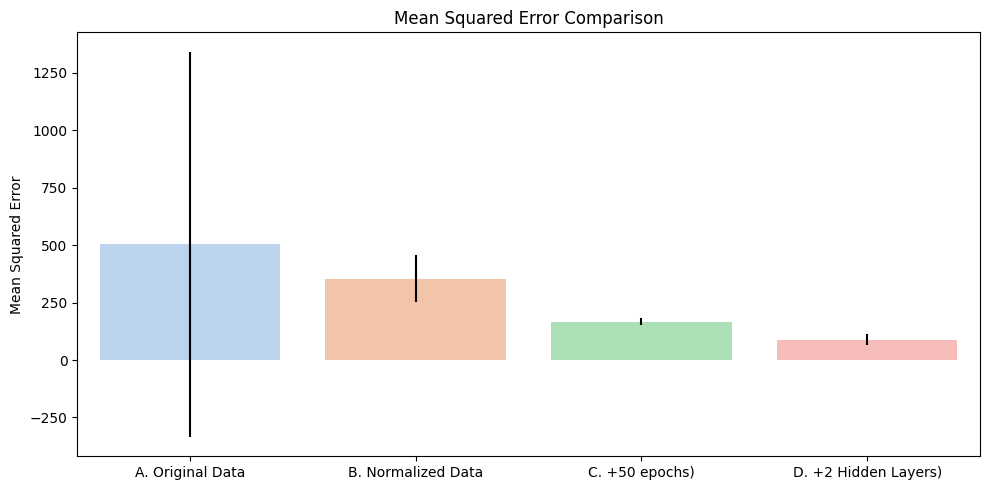

In [42]:
# define MSE values and their corresponding labels
mse_values = [mse_mean, mse_mean_norm, mse_mean_norm_2, mse_mean_norm_3]
mse_std_values = [mse_std, mse_std_norm, mse_std_norm_2, mse_std_norm_3]
labels = ['A. Original Data', 'B. Normalized Data', 'C. +50 epochs)', 'D. +2 Hidden Layers)']

# plot MSE values with error bars
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=mse_values, palette='pastel', alpha=0.8, errorbar='sd', yerr=mse_std_values)
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

#### By plotting the errors, it becomes even clearer that our results have gradually improved as we improved our model. Increasing the epochs has significantly reduced errors, and so has increasing the number of layers.